In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

historical_data = pd.read_csv('historical_data.csv')
historical_data.head(20)

,Pasien Code,Grand Total,Total Material Cost,Treatment Frequency,Average Spending,Average Material Cost,Category,Label
0,PC - Bambang,20125000.0,870069.0,8,2515625.0,108759.0,1,High
1,PC - Ramadhan,15875000.0,802702.0,12,1322917.0,66892.0,1,High
2,Amin 987,13975000.0,670731.0,5,2795000.0,134146.0,1,High
3,PC Romli,8850000.0,277643.0,5,1770000.0,55529.0,1,High
4,PC Ni Made,8150000.0,289368.0,5,1630000.0,57874.0,1,High
5,Tondo Subagio,8100000.0,1110771.0,10,810000.0,111077.0,1,High
6,PC - Anis,8075000.0,323333.0,9,897222.0,35926.0,2,High
7,Imam KOI,7575000.0,339368.0,6,1262500.0,56561.0,2,High
8,PC Nur Hidayati,7425000.0,339368.0,6,1237500.0,56561.0,2,High
9,PC EKA,6775000.0,284684.0,8,846875.0,35586.0,2,High


In [2]:
# # perform clustering based on the historical data column of treatment frequency and average spending
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# StandardScaler = StandardScaler()
# historical_data['Scaled Treatment Frequency'] = StandardScaler.fit_transform(historical_data[['Treatment Frequency']])
# historical_data['Scaled Average Spending'] = StandardScaler.fit_transform(historical_data[['Average Spending']])
# kmeans = KMeans(n_clusters=5, random_state=0).fit(historical_data[['Scaled Treatment Frequency', 'Scaled Average Spending']])
# historical_data['Cluster'] = kmeans.labels_
# historical_data

In [3]:
# historical_data['Grand Total'] = historical_data['Grand Total'].str.replace('Rp', '').str.replace(',', '').astype(float)
# historical_data['Average Spending'] = historical_data['Average Spending'].str.replace('Rp','').str.replace(',','').astype(float)
# historical_data['Total Material Cost'] = historical_data['Total Material Cost'].str.replace('Rp','').str.replace(',','').astype(float)
# historical_data['Average Material Cost'] = historical_data['Average Material Cost'].str.replace('Rp','').str.replace(',','').astype(float)
# historical_data

In [4]:
# historical_data.to_csv('historical_data.csv', index=False)

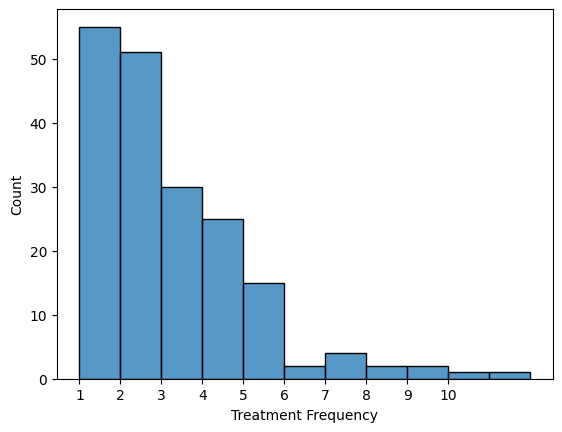

In [5]:
# create hitogram for 'treatment frequency' column 
sns.histplot(historical_data['Treatment Frequency'])

# fix the x-axis ticks
plt.xticks(np.arange(1, 11, 1))
plt.show()

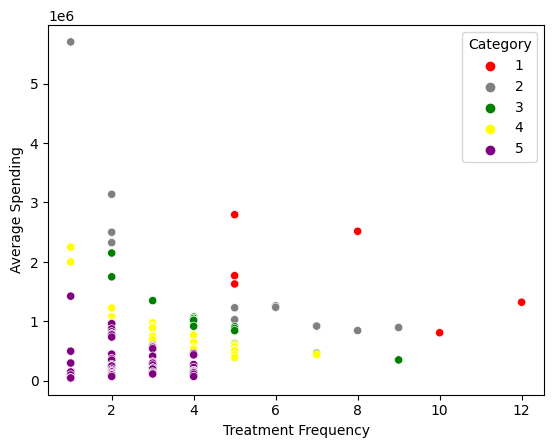

In [7]:
# create scatter plot for 'treatment frequency' and 'average spending' columns with 'category' as hue using contrast coloring of hue
sns.scatterplot(data=historical_data, x='Treatment Frequency', y='Average Spending', hue='Category', palette=['red', 'grey', 'green', 'yellow', 'purple'])
plt.show()



In [15]:
grouped = historical_data.groupby('Category').agg(
    # Calculate the weighted average for Average Spending
    avg_spending_weighted=('Average Spending', lambda x: (historical_data.loc[x.index, 'Average Spending'] * historical_data.loc[x.index, 'Treatment Frequency']).sum() / historical_data.loc[x.index, 'Treatment Frequency'].sum()),
    # Calculate the weighted average for Average Material Cost using Total Material Cost
    avg_material_cost_weighted=('Average Material Cost', lambda x: (historical_data.loc[x.index, 'Average Material Cost'] * historical_data.loc[x.index, 'Treatment Frequency']).sum() / historical_data.loc[x.index, 'Treatment Frequency'].sum()),
    # Keep the simple mean for Treatment Frequency
    avg_treatment_frequency=('Treatment Frequency', 'mean'),
    # Count the number of items in each category
    count=('Category', 'size')
).reset_index()

# Rename columns for clarity
grouped.columns = ['Category', 'Average Spending (Rp.)', 'Average Material Cost (Rp.)', 'Average Treatment Frequency', 'Count']

# Display the grouped dataframe
grouped


,Category,Average Spending (Rp.),Average Material Cost (Rp.),Average Treatment Frequency,Count
0,1,1.668333e+06,89362.022222,7.500000,6
1,2,1.261667e+06,50092.683333,5.000000,12
2,3,9.031646e+05,42156.240506,4.388889,18
3,4,7.459596e+05,33177.141414,3.193548,31
4,5,3.076596e+05,16545.757447,1.942149,121


In [16]:
# round the average spending, average material cost into 0 decimal places and average treatment frequency columns to 2 decimal places 
grouped['Average Spending (Rp.)'] = grouped['Average Spending (Rp.)'].round(0)
grouped['Average Material Cost (Rp.)'] = grouped['Average Material Cost (Rp.)'].round(0)
grouped['Average Treatment Frequency'] = grouped['Average Treatment Frequency'].round(2)
grouped.to_csv('average_historical_data.csv', index=False)

In [12]:
# # create groupby df for 'category' columns and find the average of grand total, and treatment frequency, and each of category count, reset the index. 
# grouped = historical_data.groupby('Category').agg({'Grand Total':'mean', 'Total Material Cost':'mean', 'Treatment Frequency':'mean', 'Category':'count'}).rename(columns={'Category':'Count'}).reset_index() 
# grouped.columns = ['Category', 'Average Grand Total', 'Average Material Cost', 'Average Treatment Frequency', 'Count']
# grouped.to_csv('average_historical_data.csv', index=False)


In [13]:
# # round the average grand total, average material cost into 0 decimal places, and average treatment frequency into 2 decimal places
# grouped['Average Grand Total'] = grouped['Average Grand Total'].round(0)
# grouped['Average Material Cost'] = grouped['Average Material Cost'].round(0)
# grouped['Average Treatment Frequency'] = grouped['Average Treatment Frequency'].round(2)
# grouped.to_csv('average_historical_data.csv', index=False)

In [26]:
historical_data.describe()

,Grand Total,Total Material Cost,Treatment Frequency,Average Spending,Average Material Cost,Category
count,1.880000e+02,1.880000e+02,188.000000,1.880000e+02,188.000000,188.000000
mean,1.958910e+06,9.324438e+04,2.755319,6.076055e+05,26761.489362,4.324468
std,2.718789e+06,1.420896e+05,1.905164,6.871561e+05,28959.677334,1.087625
min,5.000000e+04,0.000000e+00,1.000000,5.000000e+04,0.000000,1.000000
25%,1.875000e+05,0.000000e+00,1.000000,1.500000e+05,0.000000,4.000000
50%,9.250000e+05,6.147900e+04,2.000000,3.513890e+05,21170.000000,5.000000
75%,2.337500e+06,1.133330e+05,4.000000,9.004165e+05,39980.500000,5.000000
max,2.012500e+07,1.110771e+06,12.000000,5.700000e+06,200000.000000,5.000000


c:\Users\Zak\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 22.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Zak\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Zak\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Zak\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 29.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Zak\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 68.6% of the points cannot be

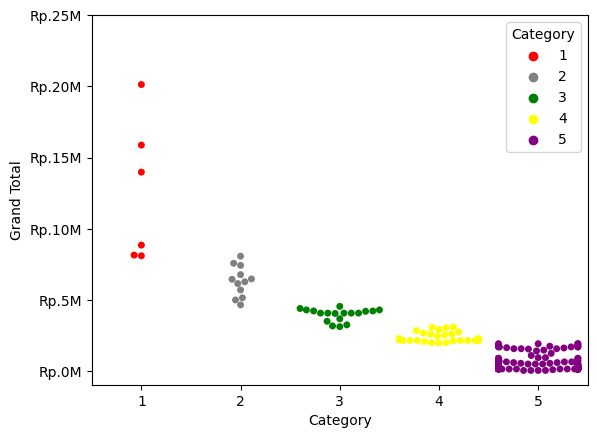

In [34]:
# create horizontal swarm plot for 'category' and 'grand total' columns with 'category' as hue using contrast coloring of hue
sns.swarmplot(data=historical_data, x='Category', y='Grand Total', hue='Category', palette=['red', 'grey', 'green', 'yellow', 'purple'])

# fix the y-axis label to be in Rp. format and in millions with maximum value of 25 million 
plt.yticks(np.arange(0, 25000001, 5000000), [f'Rp.{i/1000000:.0f}M' for i in np.arange(0, 25000001, 5000000)])


plt.show()